In [4]:
import numpy as np
from vae.arch2 import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [5]:
vae = VAE()
vae.set_weights('./vae/adam_64_heU_plus_bigR_0Tol.h5')

In [6]:
DIR_NAME = './data/small_rollout_processed/'
file = os.listdir(DIR_NAME)[50]
print(file)
obs_data = np.load(DIR_NAME + file)['bullet_emphasised']
print(obs_data.shape)

8289736.npz
(393, 64, 64, 3)


In [7]:
# plot_model(vae.full_model, to_file='./vae/model.png', show_shapes=True)

KeyboardInterrupt: 

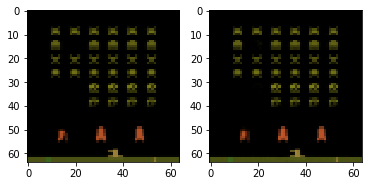

In [8]:
### output from one episode

for idx in range(100,400):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow(z_decoded)
    
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

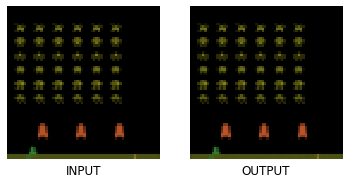

In [9]:
### output from the full_model
DIR_NAME = './data/small_rollout_processed/'
file = os.listdir(DIR_NAME)[60]
obs_data = np.load(DIR_NAME + file)['bullet_emphasised']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [10]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [ -1.2556 -18.1446  -3.6369  -6.4882  10.28    -0.7065  15.815   -1.9865
   2.106   -0.7199   3.9315   0.1576  -6.6714   7.0037   4.8237   2.1591
   6.7151  -4.8435   5.7433   5.192   -4.6494   3.4812  -9.0523   1.3571
  -2.9975  -1.8857 -12.5399   6.1335  19.7678 -13.7607 -11.157   -4.6217
   2.7334  -2.089    4.362   12.3232  -2.2209 -13.8068   7.9109  -8.1497
  -8.1453   2.0283  -5.6403   4.6732   4.8368   6.5094 -24.5107   1.4854
   2.9115  -5.3205   9.3263  -2.9727  -7.4676  -2.2285  22.3864  16.136
  -7.6183  -8.8133   1.6775   9.1867  -0.3364  30.8161   2.4805  -4.101 ]
log_var = [-55.5311 -64.9044 -53.4153 -56.3527 -60.0606 -57.7147 -66.6452 -54.9092
 -65.9835 -53.4904 -60.6142 -59.8244 -54.8836 -57.772  -56.1878 -55.1071
 -51.0979 -62.2619 -60.7493 -57.5943 -57.8922 -57.3966 -58.497  -63.7776
 -57.2356 -58.994  -64.7925 -62.6287 -53.6097 -64.1349 -61.672  -59.0443
 -58.8284 -53.2164 -64.3129 -67.7208 -58.6391 -62.4783 -51.029  -59.9837
 -60.6266 -65.0985 -60.9414 -58.325 

In [15]:
lv = np.abs(log_var)
np.argsort(lv)

array([38, 16, 33,  2,  9, 28, 60, 12,  7, 15, 53,  0, 14,  3, 51, 24, 49,
       21, 19, 47,  5, 45, 13, 20, 43, 63, 22, 36, 32, 25, 31, 57, 59, 44,
       11, 39,  4, 10, 40, 18, 58, 62, 42, 56, 50, 30, 48, 17, 37, 27, 54,
       23, 46, 29, 34, 26, 61,  1, 55, 52, 41,  8,  6, 35], dtype=int64)

informative dimensions:


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int64)

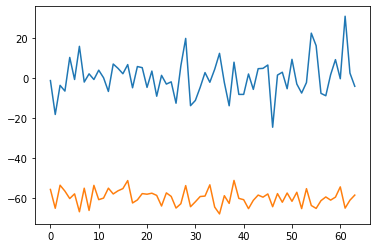

In [11]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.1)[0]
hot_zs

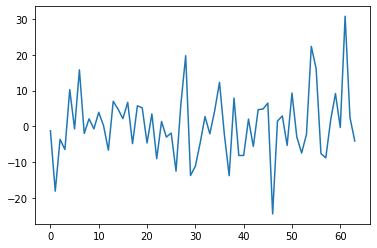

In [12]:
plt.plot(mu);

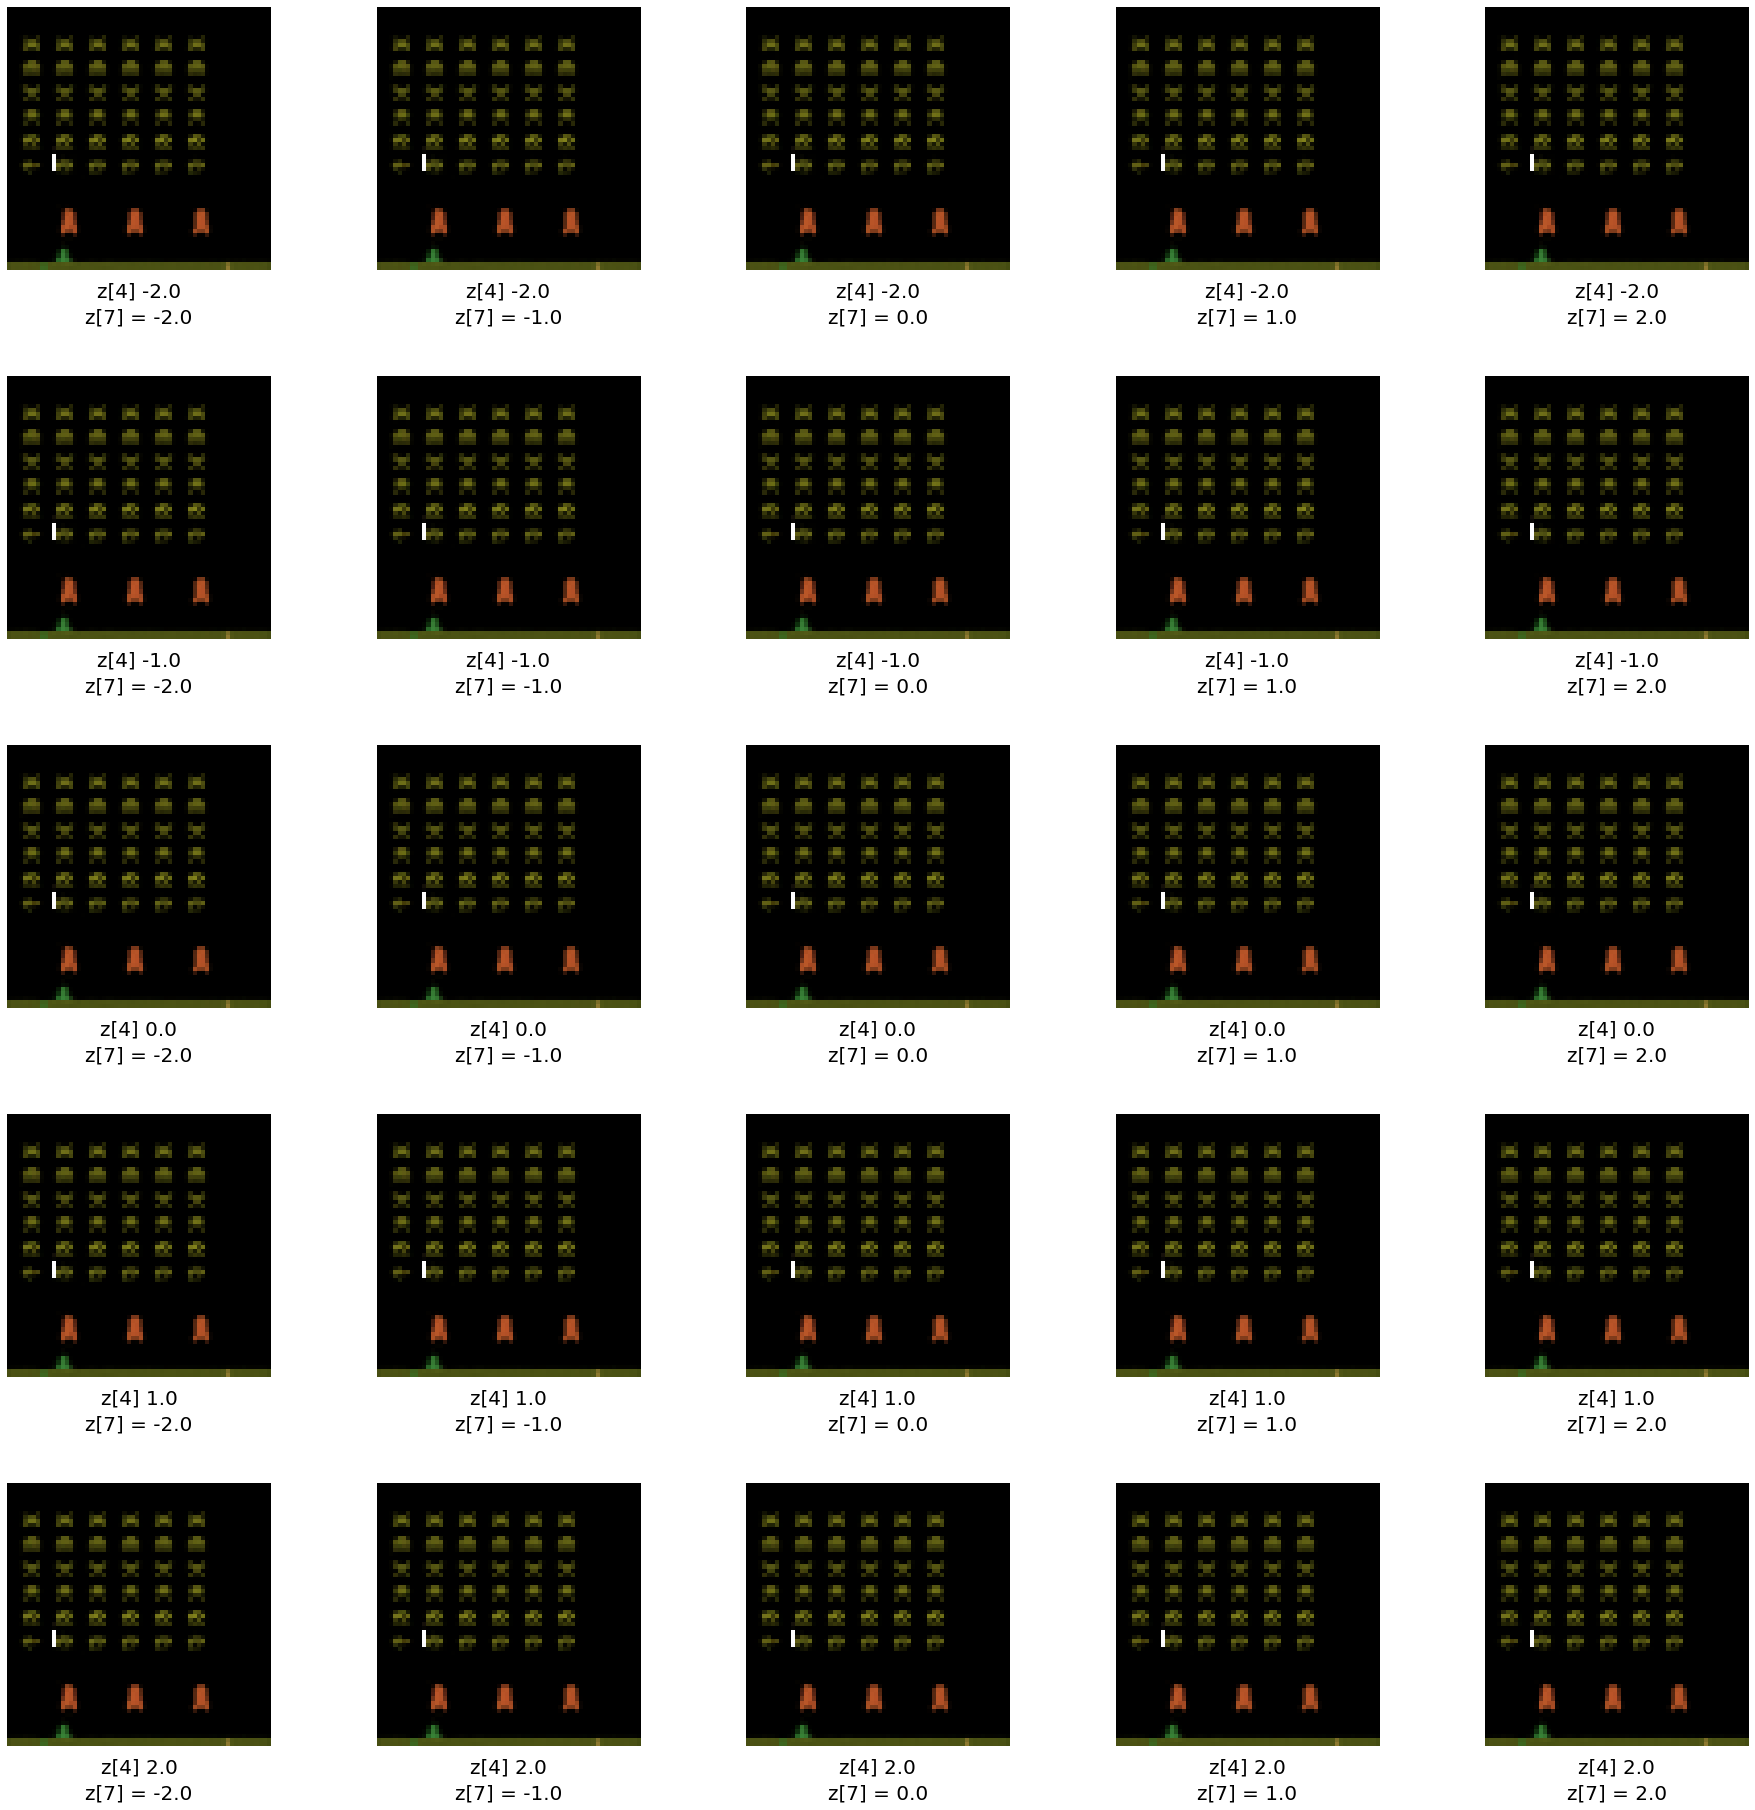

In [13]:
file1 = os.listdir(DIR_NAME)[30]
obs_data1 = np.load(DIR_NAME + file)['bullet_emphasised']
file2 = os.listdir(DIR_NAME)[50]
obs_data2 = np.load(DIR_NAME + file)['bullet_emphasised']

top_left = vae.encoder.predict(np.array([obs_data1[20]]))[0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[4] = (x-2)
        z[7] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[4] ' + str(np.round(z[4],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[7] = ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [22]:
encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
mu = encoded_mu_log_var[0][0]
log_var = encoded_mu_log_var[1][0]
sample = vae.encoder.predict(np.array([obs]))[0]
lv = np.abs(log_var.copy())
indices = np.argsort(lv)[-8:]
print(indices)

# def play_with_z(z0 = sample_z[0]
#                 ,z2 = sample_z[2]
#                 ,z4 = sample_z[4]
#                 ,z5 = sample_z[5]
#                 ,z6 = sample_z[6]
#                 ,z7 = sample_z[7]
#                 ,z10 = sample_z[10]
#                 ,z15 = sample_z[15]
#                 ,z24= sample_z[24]
#                 ,z25= sample_z[25]
#                 ,z27= sample_z[27]
#                 ):
#     z = sample_z.copy()
#     z[0] = z0
#     z[2] = z2
#     z[4] = z4
#     z[5] = z5
#     z[6] = z6
#     z[7] = z7
#     z[10] = z10
#     z[15] = z15
#     z[24] = z24
#     z[25] = z25
#     z[27] = z27
    
#     decoded_obs = vae.decoder.predict(np.array([z]))[0]
#     plt.gca().cla() 
#     plt.imshow( decoded_obs)

# interact(play_with_z
#         , z0=(-3.0,3.0,0.1)
#         , z2=(-3.0,3.0,0.1)
#         , z4=(-3.0,3.0,0.1)
#         , z5=(-3.0,3.0,0.1)
#         , z6=(-3.0,3.0,0.1)
#         , z7=(-3.0,3.0,0.1)
#         , z10=(-3.0,3.0,0.1)
#         , z15=(-3.0,3.0,0.1)
#         , z24=(-3.0,3.0,0.1)
#         , z25=(-3.0,3.0,0.1)
#         , z27=(-3.0,3.0,0.1)
#         );

[61  1 55 52 41  8  6 35]


In [26]:
def z_slider(z35=sample[35], 
             z6=sample[6], 
             z8=sample[8], 
             z41=sample[41], 
             z52=sample[52]):
    z = sample.copy()
    z[35] = z35
    z[6] = z6
    z[8] = z8
    z[41] = z41
    z[52] = z52
    image = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla()
    plt.imshow(image)
    
interact(z_slider, 
         z35=(-30.0, 30.0, 0.1),
         z6=(-30.0, 30.0, 0.1),
         z8=(-30.0, 30.0, 0.1),
         z41=(-30.0, 30.0, 0.1),
         z52=(-30.0, 30.0, 0.1),
        );

interactive(children=(FloatSlider(value=11.04833698272705, description='z35', max=30.0, min=-30.0), FloatSlide…